In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from collections import defaultdict

In [2]:
from src import calc_cocoa as cc

orig_data = cc.load_all_data('src/files_list.txt')
style2chat_dict = cc.get_style2chat(orig_data)

read all qual tsvs
read all chat jsons
read all lid tsvs


In [14]:
reload(cc)

<module 'src.calc_cocoa' from 'src/calc_cocoa.pyc'>

In [3]:
all_data = {}
for style, chat_list in style2chat_dict.iteritems():
#     print '*'*10
#     print style
#     print '*'*10
    all_data[style] = cc.get_general_cm_metrics(chat_list, orig_data)
# cc.get_general_cm_metrics(style2chat_dict['en_lex'], all_data)
# cc.get_general_cm_metrics(style2chat_dict['en_lex_soc'], all_data)

In [4]:
cc.viz_general(all_data)

----------	total	en2sp	en2sp_s	en_lex	en_lex_	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	451	59	49	62	48	57	56	74	46
% dial w/ cm	0.76	0.75	0.80	0.77	0.75	0.77	0.73	0.74	0.78
# utts   	3551	451	367	426	417	424	532	605	329
avg utts	7.87	7.64	7.49	6.87	8.69	7.44	9.50	8.18	7.15
# tokens	21888	2792	2224	2947	2383	2668	3159	3828	1887
avg tokens	6.16	6.19	6.06	6.92	5.71	6.29	5.94	6.33	5.74

# CM  utt	1474	183	134	222	150	180	203	260	142
% CM  utt	0.42	0.41	0.37	0.52	0.36	0.42	0.38	0.43	0.43
# spa utt	1645	214	183	160	170	192	268	305	153
% spa utt	0.46	0.47	0.50	0.38	0.41	0.45	0.50	0.50	0.47
# eng utt	345	47	40	35	85	46	42	28	22
% eng utt	0.10	0.10	0.11	0.08	0.20	0.11	0.08	0.05	0.07

m idx   	0.75	0.88	0.68	0.90	0.98	0.81	0.69	0.51	0.53
i idx   	0.25	0.23	0.25	0.28	0.25	0.24	0.26	0.24	0.28


NOT Normalized
[[172  15  13  22]
 [ 59  63  20  49]
 [ 73  18  19  37]
 [ 50  24  10  55]]
Normalized
[[0.77 0.07 0.06 0.1 ]
 [0.31 0.33 0.1  0.26]
 [0.5  0.12 0.13 0.25]
 [0.36 0.17 0.07 0.4 ]]


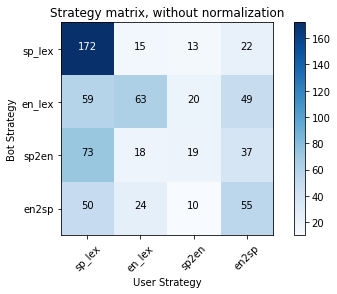

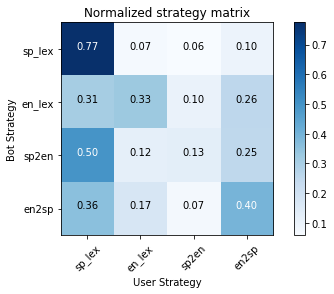

NOT Normalized
[[93  6  9 10]
 [36 51  5 35]
 [98 22 19 34]
 [57 11  8 29]]
Normalized
[[0.79 0.05 0.08 0.08]
 [0.28 0.4  0.04 0.28]
 [0.57 0.13 0.11 0.2 ]
 [0.54 0.1  0.08 0.28]]


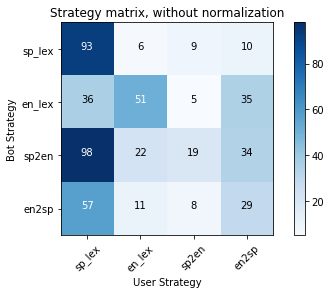

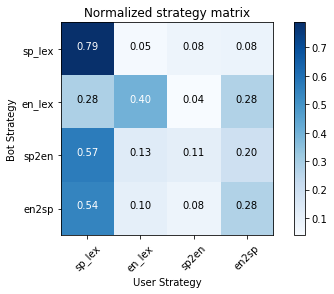

In [5]:
cc.viz_cm_style(all_data, is_social=False)
cc.viz_cm_style(all_data, is_social=True)

In [7]:
for i in all_data['sp2en']['style_utt']['s-0']:
    print i

me too , yes i have 2 friends who likes la jardineria
tienes uno que majored in urban planning ?
nop el que works in the clinic le gusta la manana   studied biology that 's our common friend
no tengo ningun amigo que estudio ingenieria and i have one friend who works at the clinic
tienes algun amigo que estudio quimica or who likes traveling ?
no tengo ningun amigo que estudio espanol and i have one friend who works in a factory
tienes algun amigo que le guste la filosofia and whiting ?
ese no es one of my friends
si tambien tengo un amigo que estudio arte , pero no trabaja in the hair salon
yo tengo 2 amigos a los que le gusta la fotogragia y and five who likes the night
tengo 4 amigos especializados en contabilidad and two who likes baking
no tengo ningun amigo que estudio arquitectura but i have 5 who like afternoon
tienes algun amigo que estudio japones or who likes sports ?
si , tengo 4 amigos que estudiaron contabilidad and i do n't have any friends who likes singing
tienes algun

# Examine MTurk vs Figure 8

In [8]:
# create dict where key='mturk'/'fig8'/'none', value is chat_list

platform2chat = defaultdict(list)
ctr = 0
for chat_id, chat_dict in orig_data.iteritems():
    try:
        worker_id = chat_dict['worker_id']
        if worker_id.startswith('A'):
            platform = 'mturk'
        elif worker_id == '[none]':
            platform = 'none'
        else:
            platform = 'fig8'
    except:
        ctr += 1
        continue
        
    platform2chat[platform].append(chat_id)
    
print '[non-survey]:', ctr
for platform, chat_list in platform2chat.iteritems():
    print '{}\t{}'.format(platform, len(chat_list))

[non-survey]: 43
none	17
mturk	187
fig8	279


In [22]:
from src import cm_metrics
reload(cm_metrics)
reload(cc)

<module 'src.calc_cocoa' from 'src/calc_cocoa.py'>

**********
mturk
**********
----------	total	en2sp	en2sp_s	en_lex	en_lex_	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	181	22	19	28	19	25	18	28	22
% dial w/ cm	0.90	0.86	1.00	0.86	0.95	0.88	0.89	0.93	0.82
# utts   	1623	197	168	222	205	192	193	273	173
avg utts	8.97	8.95	8.84	7.93	10.79	7.68	10.72	9.75	7.86
# tokens	10849	1440	1139	1549	1341	1228	1309	1797	1046
avg tokens	6.68	7.31	6.78	6.98	6.54	6.40	6.78	6.58	6.05

# CM  utt	762	95	72	131	94	83	84	118	85
% CM  utt	0.47	0.48	0.43	0.59	0.46	0.43	0.44	0.43	0.49
# spa utt	725	87	72	82	77	95	93	142	77
% spa utt	0.45	0.44	0.43	0.37	0.38	0.49	0.48	0.52	0.45
# eng utt	111	13	23	6	31	13	9	11	5
% eng utt	0.07	0.07	0.14	0.03	0.15	0.07	0.05	0.04	0.03

m idx   	0.74	0.85	0.73	0.91	0.99	0.73	0.79	0.46	0.49
i idx   	0.29	0.26	0.31	0.31	0.35	0.28	0.27	0.27	0.26
NOT Normalized
Normalized


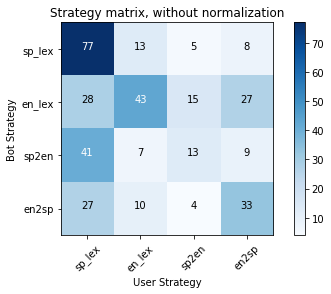

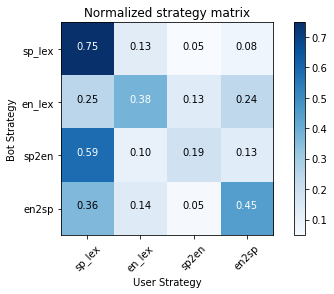

**********
fig8
**********
----------	total	en2sp	en2sp_s	en_lex	en_lex_	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	228	31	26	29	23	28	33	36	22
% dial w/ cm	0.68	0.65	0.65	0.72	0.70	0.68	0.67	0.64	0.77
# utts   	1648	214	162	186	157	207	306	263	153
avg utts	7.23	6.90	6.23	6.41	6.83	7.39	9.27	7.31	6.95
# tokens	9518	1167	890	1260	833	1341	1620	1584	823
avg tokens	5.78	5.45	5.49	6.77	5.31	6.48	5.29	6.02	5.38

# CM  utt	619	76	53	83	50	91	103	107	56
% CM  utt	0.38	0.36	0.33	0.45	0.32	0.44	0.34	0.41	0.37
# spa utt	771	101	88	70	63	82	161	132	74
% spa utt	0.47	0.47	0.54	0.38	0.40	0.40	0.53	0.50	0.48
# eng utt	208	32	13	28	40	32	31	15	17
% eng utt	0.13	0.15	0.08	0.15	0.25	0.15	0.10	0.06	0.11

m idx   	0.77	0.95	0.67	0.93	0.99	0.90	0.61	0.55	0.60
i idx   	0.23	0.22	0.21	0.25	0.20	0.20	0.24	0.19	0.33
NOT Normalized
Normalized


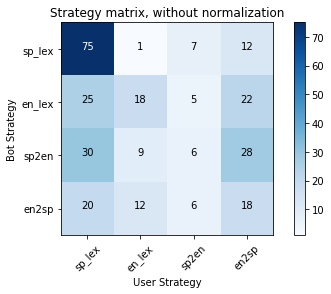

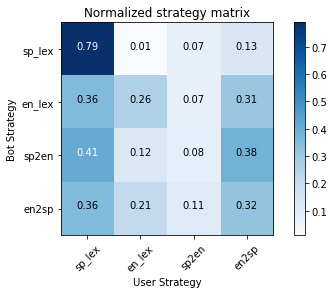

In [23]:
# compare visualizations of styles between MTURK & FIG8
# intersect platform2chat and style2chat chat_id lists

for platform, plat_chat_list in platform2chat.iteritems():
    if platform == 'none':
        continue
        
    print '*'*10
    print platform
    print '*'*10
    plat_data = {}
    for style, style_chat_list in style2chat_dict.iteritems():
#         print '*'*10
#         print style
#         print '*'*10
        chat_list = [chat_id for chat_id in plat_chat_list if chat_id in style_chat_list]
        if not chat_list:
            print 'OH NO'
        plat_data[style] = cc.get_general_cm_metrics(chat_list, orig_data)
        
    cc.viz_general(plat_data)
    cc.viz_cm_style(plat_data)

# Examine across Task Success

In [14]:
# create dict where key=0/1, value is chat_list

success2chat = defaultdict(list)
ctr = 0
for chat_id, chat_dict in orig_data.iteritems():
    try:
        outcome = int(chat_dict['outcome'])
    except:
        ctr += 1
        continue
        
    success2chat[outcome].append(chat_id)
    
print '[neither]:', ctr
for outcome, chat_list in success2chat.iteritems():
    print '{}\t{}'.format(outcome, len(chat_list))

[neither]: 32
0	124
1	261


**********
0
**********
----------	total	en2sp	en2sp_s	en_lex	en_lex_	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	122	10	13	19	13	8	22	30	7
% dial w/ cm	0.81	0.80	0.77	0.95	0.92	0.88	0.73	0.77	0.71
# utts   	1418	110	150	200	170	97	285	336	70
avg utts	11.62	11.00	11.54	10.53	13.08	12.12	12.95	11.20	10.00
# tokens	8855	647	908	1463	1008	622	1656	2117	434
avg tokens	6.24	5.88	6.05	7.32	5.93	6.41	5.81	6.30	6.20

# CM  utt	566	43	49	119	50	44	105	125	31
% CM  utt	0.40	0.39	0.33	0.59	0.29	0.45	0.37	0.37	0.44
# spa utt	694	47	80	68	76	48	150	192	33
% spa utt	0.49	0.43	0.53	0.34	0.45	0.49	0.53	0.57	0.47
# eng utt	137	20	17	11	43	5	20	17	4
% eng utt	0.10	0.18	0.11	0.06	0.25	0.05	0.07	0.05	0.06

m idx   	0.70	1.00	0.61	0.88	0.91	0.58	0.61	0.48	0.55
i idx   	0.25	0.26	0.20	0.35	0.19	0.26	0.28	0.19	0.24
NOT Normalized
[[84  8  4 10]
 [32 36 12 25]
 [24  7  2  4]
 [ 8  8  3  7]]
Normalized
[[0.79 0.08 0.04 0.09]
 [0.3  0.34 0.11 0.24]
 [0.65 0.19 0.05 0.11]
 [0.31 0.31 0.12 0.27]]


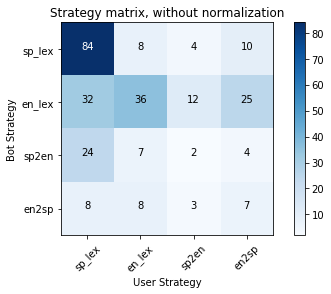

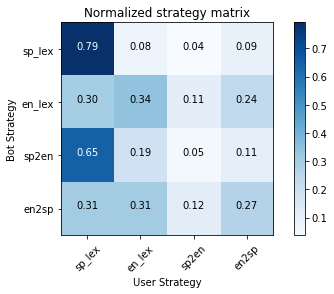

**********
1
**********
----------	total	en2sp	en2sp_s	en_lex	en_lex_	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	222	37	22	30	21	34	22	25	31
% dial w/ cm	0.77	0.70	0.86	0.67	0.81	0.82	0.77	0.76	0.77
# utts   	1399	265	131	144	137	241	146	150	185
avg utts	6.30	7.16	5.95	4.80	6.52	7.09	6.64	6.00	5.97
# tokens	8639	1670	767	869	805	1564	937	1024	1003
avg tokens	6.18	6.30	5.85	6.03	5.88	6.49	6.42	6.83	5.42

# CM  utt	603	110	52	61	63	104	59	79	75
% CM  utt	0.43	0.42	0.40	0.42	0.46	0.43	0.40	0.53	0.41
# spa utt	639	130	56	72	53	101	73	63	91
% spa utt	0.46	0.49	0.43	0.50	0.39	0.42	0.50	0.42	0.49
# eng utt	121	20	19	7	16	34	9	6	10
% eng utt	0.09	0.08	0.15	0.05	0.12	0.14	0.06	0.04	0.05

m idx   	0.75	0.76	0.88	0.79	0.99	0.89	0.71	0.52	0.45
i idx   	0.26	0.23	0.28	0.23	0.30	0.24	0.23	0.26	0.30
NOT Normalized
[[59  6  2  4]
 [20 17  3 11]
 [40  5 16 22]
 [37  7  5 39]]
Normalized
[[0.83 0.08 0.03 0.06]
 [0.39 0.33 0.06 0.22]
 [0.48 0.06 0.19 0.27]
 [0.42 0.08 0.06 0.44]]


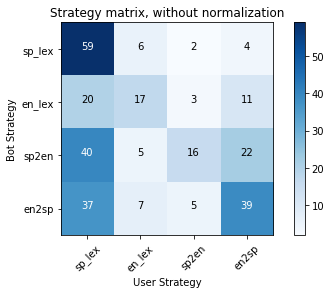

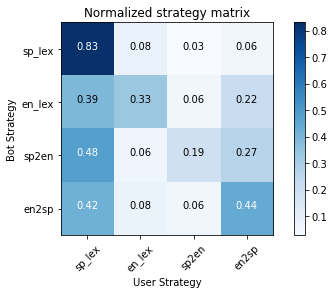

In [15]:
# compare visualizations of styles between Success = 0 or 1
# intersect success2chat and style2chat chat_id lists

for outcome, out_chat_list in success2chat.iteritems():
    print '*'*10
    print outcome
    print '*'*10
    out_data = {}
    for style, style_chat_list in style2chat_dict.iteritems():
#         print '*'*10
#         print style
#         print '*'*10
        chat_list = [chat_id for chat_id in out_chat_list if chat_id in style_chat_list]
        if not chat_list:
            print 'OH NO'
        out_data[style] = cc.get_general_cm_metrics(chat_list, orig_data)
        
    cc.viz_general(out_data)
    cc.viz_cm_style(out_data)

# Remove dialogues of < 3 utterances
Doesn't seem to do much...

In [24]:
greaterthan2chat = []
ctr = 0
short = 0
for chat_id, chat_dict in orig_data.iteritems():
    try:
        outcome = len(chat_dict['lbl_dict'])
        if outcome > 4:
            greaterthan2chat.append(chat_id)
        else:
            short += 1
    except:
        ctr += 1
   
print '[neither]:', ctr
print 'Short\t{}'.format(short)
print 'Long\t{}'.format(len(greaterthan2chat))

[neither]: 52
Short	119
Long	246


----------	total	en2sp	en2sp_s	en_lex	en_lex_	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	246	32	24	31	28	32	38	42	19
% dial w/ cm	0.88	0.88	0.88	0.94	0.86	0.97	0.79	0.88	0.84
# utts   	2602	340	254	302	310	326	414	460	196
avg utts	10.58	10.62	10.58	9.74	11.07	10.19	10.89	10.95	10.32
# tokens	16024	2130	1487	2061	1764	2017	2476	2985	1104
avg tokens	6.16	6.26	5.85	6.82	5.69	6.19	5.98	6.49	5.63

# CM  utt	1073	142	89	164	102	141	157	196	82
% CM  utt	0.41	0.42	0.35	0.54	0.33	0.43	0.38	0.43	0.42
# spa utt	1239	155	126	120	144	144	214	240	96
% spa utt	0.48	0.46	0.50	0.40	0.46	0.44	0.52	0.52	0.49
# eng utt	240	38	34	14	57	37	28	21	11
% eng utt	0.09	0.11	0.13	0.05	0.18	0.11	0.07	0.05	0.06

m idx   	0.73	0.89	0.72	0.87	0.94	0.83	0.63	0.50	0.47
i idx   	0.27	0.27	0.27	0.33	0.24	0.26	0.27	0.25	0.23
NOT Normalized
[[134  12   7  13]
 [ 45  49  14  34]
 [ 63  13  13  25]
 [ 38  16   8  43]]
Normalized
[[0.81 0.07 0.04 0.08]
 [0.32 0.35 0.1  0.24]
 [0.55 0.11 0.11 0.22]
 [0.36 0.15 0.08 0.41]]


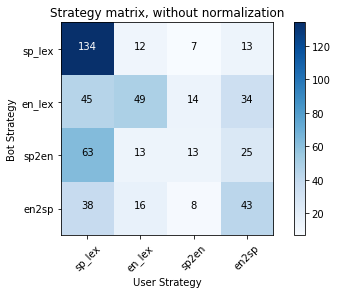

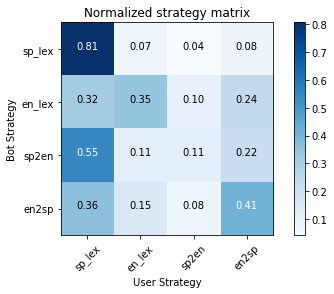

NOT Normalized
[[56  1  4  6]
 [31 30  5 18]
 [89 15 13 25]
 [37  9  4 20]]
Normalized
[[0.84 0.01 0.06 0.09]
 [0.37 0.36 0.06 0.21]
 [0.63 0.11 0.09 0.18]
 [0.53 0.13 0.06 0.29]]


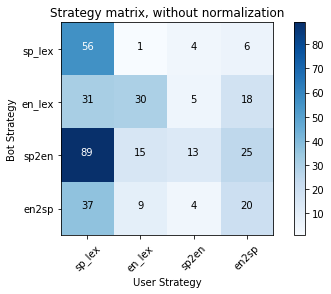

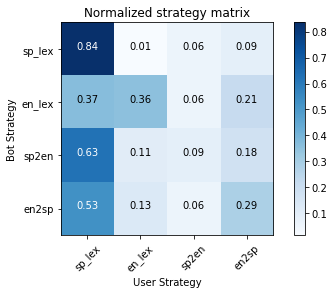

In [27]:
# visualize for "longer" chats

long_data = {}
for style, style_chat_list in style2chat_dict.iteritems():
    chat_list = [chat_id for chat_id in greaterthan2chat if chat_id in style_chat_list]
    if not chat_list:
        print 'OH NO'
    long_data[style] = cc.get_general_cm_metrics(chat_list, orig_data)

cc.viz_general(long_data)
cc.viz_cm_style(long_data, is_social=False)
cc.viz_cm_style(long_data, is_social=True)

# Examine across reported Gender

In [20]:
# create dict where key=0/1, value is chat_list

gender2chat = defaultdict(list)
ctr = 0
for chat_id, chat_dict in orig_data.iteritems():
    try:
        outcome = chat_dict['n00_gender']
    except:
        ctr += 1
        continue
        
    gender2chat[outcome].append(chat_id)
    
print '[neither]:', ctr
for outcome, chat_list in gender2chat.iteritems():
    print '{}\t{}'.format(outcome, len(chat_list))

[neither]: 32
m	232
o	6
f	147


**********
m
**********
----------	total	en2sp	en2sp_s	en_lex	en_lex_	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	201	22	21	28	23	21	26	36	24
% dial w/ cm	0.79	0.68	0.86	0.82	0.83	0.90	0.73	0.78	0.75
# utts   	1574	186	164	200	190	156	224	323	131
avg utts	7.83	8.45	7.81	7.14	8.26	7.43	8.62	8.97	5.46
# tokens	9582	1015	951	1346	1011	1076	1343	2075	765
avg tokens	6.09	5.46	5.80	6.73	5.32	6.90	6.00	6.42	5.84

# CM  utt	653	64	54	105	70	75	89	143	53
% CM  utt	0.41	0.34	0.33	0.53	0.37	0.48	0.40	0.44	0.40
# spa utt	758	107	78	81	83	75	108	160	66
% spa utt	0.48	0.58	0.48	0.41	0.44	0.48	0.48	0.50	0.50
# eng utt	128	13	27	11	31	5	19	17	5
% eng utt	0.08	0.07	0.16	0.06	0.16	0.03	0.08	0.05	0.04

m idx   	0.70	0.61	0.78	0.88	0.91	0.65	0.80	0.46	0.52
i idx   	0.27	0.24	0.29	0.28	0.26	0.26	0.28	0.23	0.31
NOT Normalized
[[108   6   3   8]
 [ 27  28  14  23]
 [ 37   7  16   4]
 [ 25   4   4  13]]
Normalized
[[0.86 0.05 0.02 0.06]
 [0.29 0.3  0.15 0.25]
 [0.58 0.11 0.25 0.06]
 [0.54 0.09 0.09 0.28]]


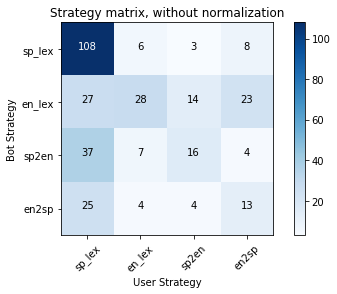

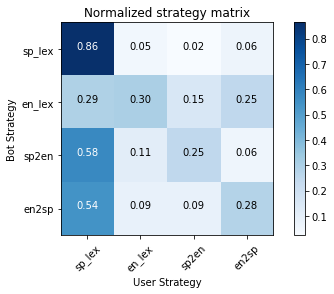

**********
f
**********
----------	total	en2sp	en2sp_s	en_lex	en_lex_	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	137	21	14	20	11	21	18	18	14
% dial w/ cm	0.78	0.76	0.79	0.75	0.91	0.76	0.78	0.78	0.79
# utts   	1205	159	117	143	117	182	207	156	124
avg utts	8.80	7.57	8.36	7.15	10.64	8.67	11.50	8.67	8.86
# tokens	7735	1136	724	985	802	1110	1250	1056	672
avg tokens	6.42	7.14	6.19	6.89	6.85	6.10	6.04	6.77	5.42

# CM  utt	500	73	47	75	43	73	75	61	53
% CM  utt	0.41	0.46	0.40	0.52	0.37	0.40	0.36	0.39	0.43
# spa utt	555	58	58	58	46	74	115	88	58
% spa utt	0.46	0.36	0.50	0.41	0.39	0.41	0.56	0.56	0.47
# eng utt	128	25	9	7	28	34	10	6	9
% eng utt	0.11	0.16	0.08	0.05	0.24	0.19	0.05	0.04	0.07

m idx   	0.74	0.96	0.70	0.80	0.99	0.95	0.47	0.58	0.43
i idx   	0.23	0.23	0.19	0.28	0.26	0.23	0.22	0.21	0.25
NOT Normalized
[[35  8  3  6]
 [25 25  1 13]
 [27  5  2 22]
 [20  8  3 24]]
Normalized
[[0.67 0.15 0.06 0.12]
 [0.39 0.39 0.02 0.2 ]
 [0.48 0.09 0.04 0.39]
 [0.36 0.15 0.05 0.44]]


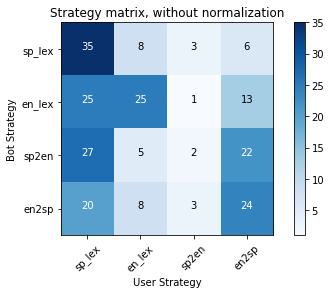

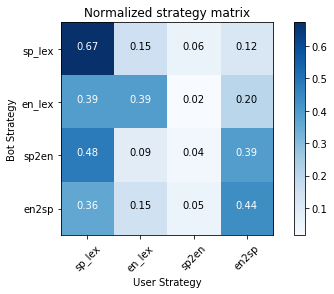

In [23]:
# compare visualizations of styles between Success = 0 or 1
# intersect success2chat and style2chat chat_id lists

for outcome, out_chat_list in gender2chat.iteritems():
    if outcome == 'o':
        continue
    print '*'*10
    print outcome
    print '*'*10
    out_data = {}
    for style, style_chat_list in style2chat_dict.iteritems():
#         print '*'*10
#         print style
#         print '*'*10
        chat_list = [chat_id for chat_id in out_chat_list if chat_id in style_chat_list]
        if not chat_list:
            print 'OH NO'
            continue
        out_data[style] = cc.get_general_cm_metrics(chat_list, orig_data)
        
    cc.viz_general(out_data)
    cc.viz_cm_style(out_data)

* women speak avg 1 more utt per dialogue than men
* similar proportion of dialogues w/ CM, % CM utterances
* women have slightly higher m-idx, slightly lower i-idx
* ratio of women is ~ 40% 